### Feature Engineering:

In the following cells, we will engineer / pre-process the variables of the House Price Dataset from Kaggle. We will engineer the variables so that we tackle:

* Duplicate check
* Missing values
* Temporal variables
* Selective transformation of incorrectly scaled values
* Standarise the values of all variables to the same range (Standardization)
* Encoding of Categorical variables
* Forming new meaningful features if needed
* Dropping redundant columns
* Multi-Colinearity check and removal
* Outlier check and removal

### Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

### Load Dataset:

In [2]:
df = pd.read_csv('zillow_initial_dataset.csv')
df_copy = df.copy()
df.shape

(90275, 60)

In [3]:
df.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08
5,17125829,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,66.0,1303.0,2882.0,2882.0,NaN,NaN,1303.0,NaN,6111.0,1.0,2.0,2.0,473.0,NaN,NaN,34240014.0,-119024793.0,10000.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111005e+07,51239.0,2061.0,NaN,97089.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1980.0,2.0,NaN,222070.0,289609.0,2015.0,67539.0,3110.44,NaN,NaN,6.111005e+13,0.0564,2016-08-26
6,17132911,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1772.0,1772.0,1772.0,NaN,NaN,1772.0,NaN,6111.0,1.0,2.0,2.0,467.0,NaN,NaN,34226842.0,-119059815.0,8059.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111006e+07,51239.0,2061.0,NaN,97089.0,6.0,NaN,NaN,NaN,NaN,1045.0,NaN,1978.0,1.0,NaN,185000.0,526000.0,2015.0,341000.0,5632.20,NaN,NaN,6.111006e+13,0.0315,2016-07-08
7,17134926,NaN,NaN,NaN,2.5,5.0,NaN,NaN,2.5,NaN,1240.0,2632.0,2632.0,NaN,NaN,1240.0,NaN,6111.0,1.0,2.0,2.0,440.0,NaN,NaN,34229816.0,-119050224.0,7602.0,1.0,800.0,NaN,NaN,1.0,1111,261.0,NaN,6.111006e+07,51239.0,2061.0,NaN,97089.0,8.0,NaN,1.0,NaN,NaN,180.0,NaN,1971.0,2.0,NaN,342611.0,571086.0,2015.0,228475.0,6109.94,NaN,NaN,6.111006e+13,0.0257,2016-05-11
8,17139988,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1292.0,1292.0,1292.0,NaN,NaN,1292.0,NaN,6111.0,NaN,2.0,2.0,494.0,NaN,NaN,34226351.0,-118983853.0,7405.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111005e+07,51239.0,2061.0,NaN,97091

### Duplicate entry check and removal:

In [4]:
duplicate = df[df.duplicated('parcelid')]
duplicate.shape

(125, 60)

We observe that there are 125 rows of duplicate data with respect to the same parcelid.
Hence, we will go ahead and drop those.

In [5]:
df.drop_duplicates(subset ="parcelid", keep = 'first', inplace = True)
df.shape

(90150, 60)

###  Missing Values:

In [6]:
mis_val = [var for var in df.columns if df[var].isnull().sum()>0]
df[mis_val].isnull().sum()

airconditioningtypeid           61402
architecturalstyletypeid        89890
basementsqft                    90107
buildingclasstypeid             90134
buildingqualitytypeid           32866
calculatedbathnbr                1176
decktypeid                      89492
finishedfloor1squarefeet        83300
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
finishedsquarefeet13            90117
finishedsquarefeet15            86595
finishedsquarefeet50            83300
finishedsquarefeet6             89731
fireplacecnt                    80553
fullbathcnt                      1176
garagecarcnt                    60253
garagetotalsqft                 60253
hashottuborspa                  87787
heatingorsystemtypeid           34145
lotsizesquarefeet               10136
poolcnt                         72274
poolsizesum                     89184
pooltypeid10                    88991
pooltypeid2                     88946
pooltypeid7                     73478
propertycoun

We see plenty of missing value for multiple columns in the dataset.
1168 rows account for 100% of the data. So, in order to avoid generating synthetic data for columns which have more than 60% missing values, we will drop those columns and perform feature engineering on the rest of the data. 

### Dropping columns having >60% missing values:

In [7]:
df.shape

(90150, 60)

In [8]:
def drop_columns_with_max_missing_values(df):
    mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
    df[mis_var].isnull().sum()

    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped = [var for var in mis_var if df[var].isnull().sum() > limit]
    print('Columns with more than 60% missing values: \n\n', var_to_be_dropped)
    print('\n##### Dropping columns with more than 60% missing values #####\n')

    df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    print('Remaining columns: \n', df.columns)
    return df

df = drop_columns_with_max_missing_values(df)

Columns with more than 60% missing values: 

 ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']

##### Dropping columns with more than 60% missing values #####

Remaining columns: 
 Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycoun

In [9]:
df.shape

(90150, 31)

In [10]:
df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,34240014.0,-119024793.0,10000.0,1111,261.0,NaN,6.111005e+07,51239.0,2061.0,97089.0,8.0,NaN,1980.0,222070.0,289609.0,2015.0,67539.0,3110.44,6.111005e+13,0.0564,2016-08-26
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,34226842.0,-119059815.0,8059.0,1111,261.0,NaN,6.111006e+07,51239.0,2061.0,97089.0,6.0,NaN,1978.0,185000.0,526000.0,2015.0,341000.0,5632.20,6.111006e+13,0.0315,2016-07-08
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,34229816.0,-119050224.0,7602.0,1111,261.0,NaN,6.111006e+07,51239.0,2061.0,97089.0,8.0,NaN,1971.0,342611.0,571086.0,2015.0,228475.0,6109.94,6.111006e+13,0.0257,2016-05-11
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,34226351.0,-118983853.0,7405.0,1111,261.0,NaN,6.111005e+07,51239.0,2061.0,97091.0,6.0,NaN,1979.0,231297.0,462594.0,2015.0,231297.0,5026.40,6.111005e+13,0.0020,2016-06-15
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,34179289.0,-119169287.0,6000.0,1111,261.0,NaN,6.111004e+07,13150.0,2061.0,97104.0,6.0,NaN,1950.0,134251.0,268502.0,2015.0,134251.0,3217.06,6.111004e+13,-0.0576,2016-05-27


### Capture elapsed time:

In [11]:
df['yeardifference'] = df['assessmentyear'] - df['yearbuilt']
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08,31.0


In [12]:
df.drop(columns=['assessmentyear', 'yearbuilt', 'transactiondate'], axis=1, inplace=True)

### Transform incorrectly scaled variables:

As mentioned in the data dictionary, the latitude and longitude has been multiplied to 10^6.
So we will perform a division of the same to scale it to original.
We will perform a similar operation for 'rawcensustractandblock'.
Also, we will perform a division of 10^12 for the 'censustractandblock' variable to bring it to original scale.

In [13]:
df[['latitude', 'longitude']] = (df[['latitude', 'longitude']])/(10**6)
df['censustractandblock'] = (df['censustractandblock'])/(10**12)
df['rawcensustractandblock'] = (df['rawcensustractandblock'])/(10**6)
df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34.303597,-119.287236,1735.0,1128,265.0,NaN,61.110022,34543.0,2061.0,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34.272866,-119.198911,NaN,1129,266.0,NaN,61.110015,34543.0,2061.0,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34.340801,-119.079610,6569.0,1111,261.0,NaN,61.110007,26965.0,2061.0,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34.354313,-119.076405,7400.0,1110,261.0,NaN,61.110008,26965.0,2061.0,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34.266578,-119.165392,6326.0,1111,261.0,NaN,61.110014,34543.0,2061.0,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,34.240014,-119.024793,10000.0,1111,261.0,NaN,61.110052,51239.0,2061.0,97089.0,8.0,NaN,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,34.226842,-119.059815,8059.0,1111,261.0,NaN,61.110055,51239.0,2061.0,97089.0,6.0,NaN,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,34.229816,-119.050224,7602.0,1111,261.0,NaN,61.110055,51239.0,2061.0,97089.0,8.0,NaN,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,34.226351,-118.983853,7405.0,1111,261.0,NaN,61.110053,51239.0,2061.0,97091.0,6.0,NaN,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,34.179289,-119.169287,6000.0,1111,261.0,NaN,61.110039,13150.0,2061.0,97104.0,6.0,NaN,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0


In [14]:
df.shape

(90150, 29)

### Handling missing values:
To deal with missing values in numerical variables, we will:

* Replace the missing values in the original variable with the mode

In [15]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           32866
calculatedbathnbr                1176
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
fips                                0
fullbathcnt                      1176
heatingorsystemtypeid           34145
latitude                            0
longitude                           0
lotsizesquarefeet               10136
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31918
rawcensustractandblock              0
regionidcity                     1801
regionidcounty                      0
regionidzip                        35
roomcnt                             0
unitcnt                         31879
structuretaxvaluedollarcnt        378
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
taxamount                           6
censustracta

In [16]:
def replace_missing_data(df, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = replace_missing_data(df, mis_var)

##### Replacing missing values with mode of features #####


In [17]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
yeardifference                  0
dtype: int64

### Encoding categorical variables:

In [18]:
cat_vars = [var for var in df.columns if df[var].dtypes=='O']
cat_vars

['propertycountylandusecode', 'propertyzoningdesc']

In [19]:
def encode_categorical_variables(df, cat_vars):
    print('##### Performing Label Encoding on Categorical Variables #####')
    print('Categorical variables: ', cat_vars)
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
    return df

df = encode_categorical_variables(df, cat_vars)

##### Performing Label Encoding on Categorical Variables #####
Categorical variables:  ['propertycountylandusecode', 'propertyzoningdesc']


In [20]:
df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,34.303597,-119.287236,1735.0,265.0,61.110022,34543.0,2061.0,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0,54,609
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0,55,609
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,34.340801,-119.079610,6569.0,261.0,61.110007,26965.0,2061.0,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0,50,609
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,34.354313,-119.076405,7400.0,261.0,61.110008,26965.0,2061.0,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0,49,609
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,34.266578,-119.165392,6326.0,261.0,61.110014,34543.0,2061.0,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0,50,609
5,17125829,2.5,4.0,7.0,2.5,2882.0,2882.0,6111.0,2.0,2.0,34.240014,-119.024793,10000.0,261.0,61.110052,51239.0,2061.0,97089.0,8.0,1.0,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0,50,609
6,17132911,2.0,3.0,7.0,2.0,1772.0,1772.0,6111.0,2.0,2.0,34.226842,-119.059815,8059.0,261.0,61.110055,51239.0,2061.0,97089.0,6.0,1.0,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0,50,609
7,17134926,2.5,5.0,7.0,2.5,2632.0,2632.0,6111.0,2.0,2.0,34.229816,-119.050224,7602.0,261.0,61.110055,51239.0,2061.0,97089.0,8.0,1.0,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0,50,609
8,17139988,2.0,3.0,7.0,2.0,1292.0,1292.0,6111.0,2.0,2.0,34.226351,-118.983853,7405.0,261.0,61.110053,51239.0,2061.0,97091.0,6.0,1.0,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0,50,609
9,17167359,1.0,3.0,7.0,1.0,1385.0,1385.0,6111.0,1.0,2.0,34.179289,-119.169287,6000.0,261.0,61.110039,13150.0,2061.0,97104.0,6.0,1.0,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0,50,609


### Checking & Removing Outliers:

In [21]:
df.shape

(90150, 29)

In [22]:
z = np.abs(stats.zscore(df))
no_out_df = df[(z<3).all(axis=1)]
no_out_df.shape

(70260, 29)

### Checking for Multi-Colinearity:

In [23]:
no_out_df.corr()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
parcelid,1.000000,0.028423,0.014068,0.427057,0.032116,0.046356,0.050844,0.875261,-0.071773,-0.197104,-0.799259,0.870357,-0.206629,0.045825,0.875924,0.172686,-0.875261,0.515522,0.515036,-0.032935,0.020601,0.108378,0.131451,0.036577,0.870684,0.025329,-0.222907,0.852989,-0.212511
bathroomcnt,0.028423,1.000000,0.576233,-0.302725,0.977620,0.723948,0.717572,0.096319,0.954987,-0.421220,0.025654,0.033585,0.022510,0.016769,0.097628,-0.024891,-0.096319,0.160784,0.040256,0.071092,0.585840,0.409102,0.239859,0.387460,0.099102,0.045766,-0.455964,0.093602,0.018170
bedroomcnt,0.014068,0.576233,1.000000,-0.093848,0.536776,0.658793,0.646947,0.062177,0.528829,-0.146429,0.067254,0.055389,-0.182343,-0.383565,0.064273,-0.016572,-0.062177,0.154325,0.198038,0.091626,0.306879,0.228897,0.142587,0.230341,0.067906,0.035055,-0.075797,0.006568,0.042841
buildingqualitytypeid,0.427057,-0.302725,-0.093848,1.000000,-0.299723,-0.205977,-0.213388,0.421916,-0.352713,0.276822,-0.401890,0.365455,-0.232023,-0.205658,0.420252,0.048790,-0.421916,0.194921,0.275909,0.049354,-0.190432,-0.055208,0.024085,-0.082563,0.417279,-0.007708,0.230517,0.387709,-0.191120
calculatedbathnbr,0.032116,0.977620,0.536776,-0.299723,1.000000,0.734344,0.725233,0.102517,0.978121,-0.441510,0.027565,0.037354,0.019215,0.020252,0.103956,-0.025117,-0.102517,0.171171,0.033440,0.085811,0.602654,0.416746,0.245013,0.401416,0.103023,0.043166,-0.458126,0.102588,0.016810
calculatedfinishedsquarefeet,0.046356,0.723948,0.658793,-0.205977,0.734344,1.000000,0.987221,0.123846,0.709037,-0.303495,0.009003,0.064941,-0.120061,-0.260786,0.125167,-0.045079,-0.123846,0.182274,0.123370,0.084267,0.670533,0.507249,0.329372,0.502419,0.125288,0.050139,-0.250244,0.076094,-0.000506
finishedsquarefeet12,0.050844,0.717572,0.646947,-0.213388,0.725233,0.987221,1.000000,0.130418,0.698733,-0.299525,0.008483,0.069499,-0.117778,-0.199295,0.131834,-0.043502,-0.130418,0.192094,0.128849,-0.051075,0.672593,0.507636,0.328845,0.501731,0.131922,0.050546,-0.265281,0.070824,0.000853
fips,0.875261,0.096319,0.062177,0.421916,0.102517,0.123846,0.130418,1.000000,-0.011524,-0.294910,-0.683274,0.705664,-0.201421,0.019266,0.999777,0.053290,-1.000000,0.667727,0.653662,-0.043558,0.064417,0.146449,0.159506,0.074968,0.994001,0.019448,-0.289936,0.971803,-0.316782
fullbathcnt,-0.071773,0.954987,0.528829,-0.352713,0.978121,0.709037,0.698733,-0.011524,1.000000,-0.413791,0.110533,-0.049075,0.043562,0.009436,-0.010022,-0.036352,0.011524,0.095528,-0.014656,0.093458,0.574096,0.385969,0.218985,0.379323,-0.010311,0.040571,-0.405678,-0.006417,0.053636
heatingorsystemtypeid,-0.197104,-0.421220,-0.146429,0.276822,-0.441510,-0.303495,-0.299525,-0.294910,-0.413791,1.000000,0.045993,-0.167438,-0.118462,-0.202664,-0.296795,0.016368,0.294910,-0.330675,-0.167427,-0.042316,-0.291480,-0.175315,-0.084778,-0.140855,-0.295272,-0.013840,0.518832,-0.326597,0.023738


<AxesSubplot:>

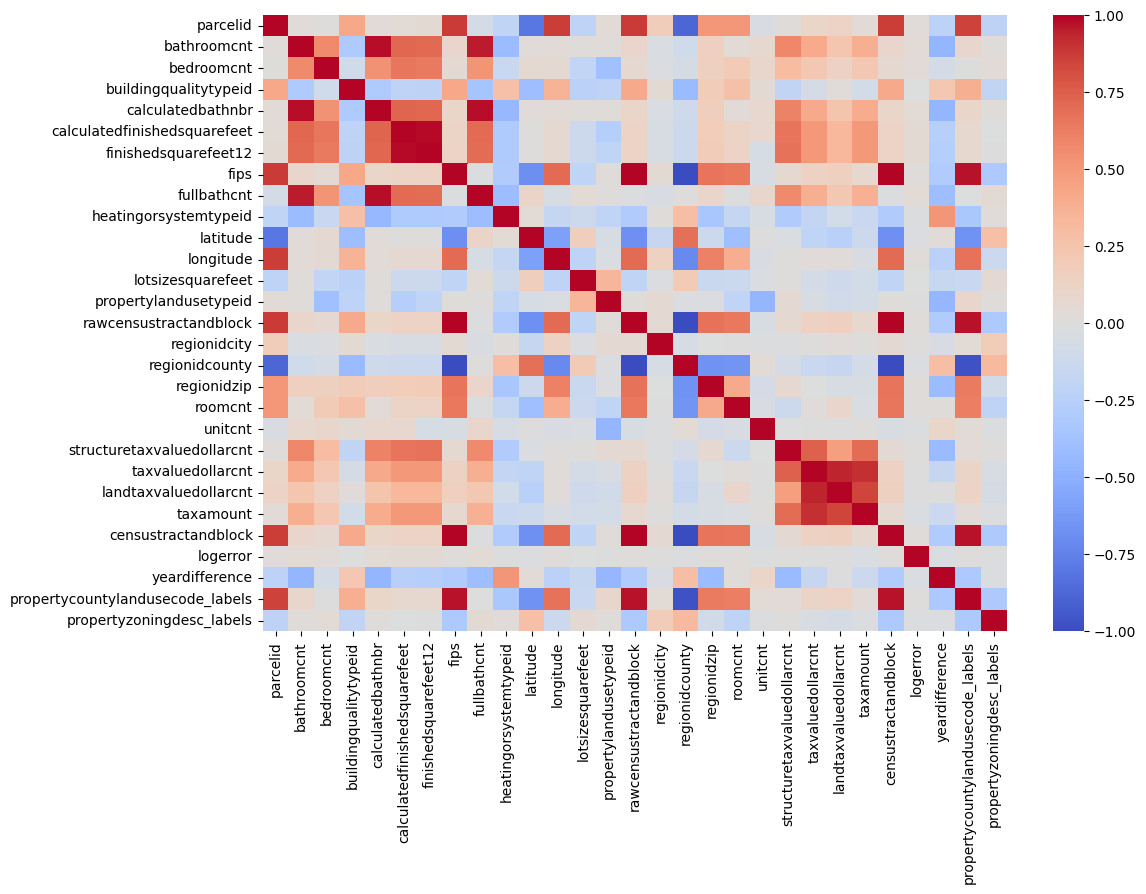

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(no_out_df.corr(), cmap='coolwarm')

We observe high correlation among some of the feature variables from the above correlation plot. Hence we will drop some of the features and then build our model on top of that.

<AxesSubplot:>

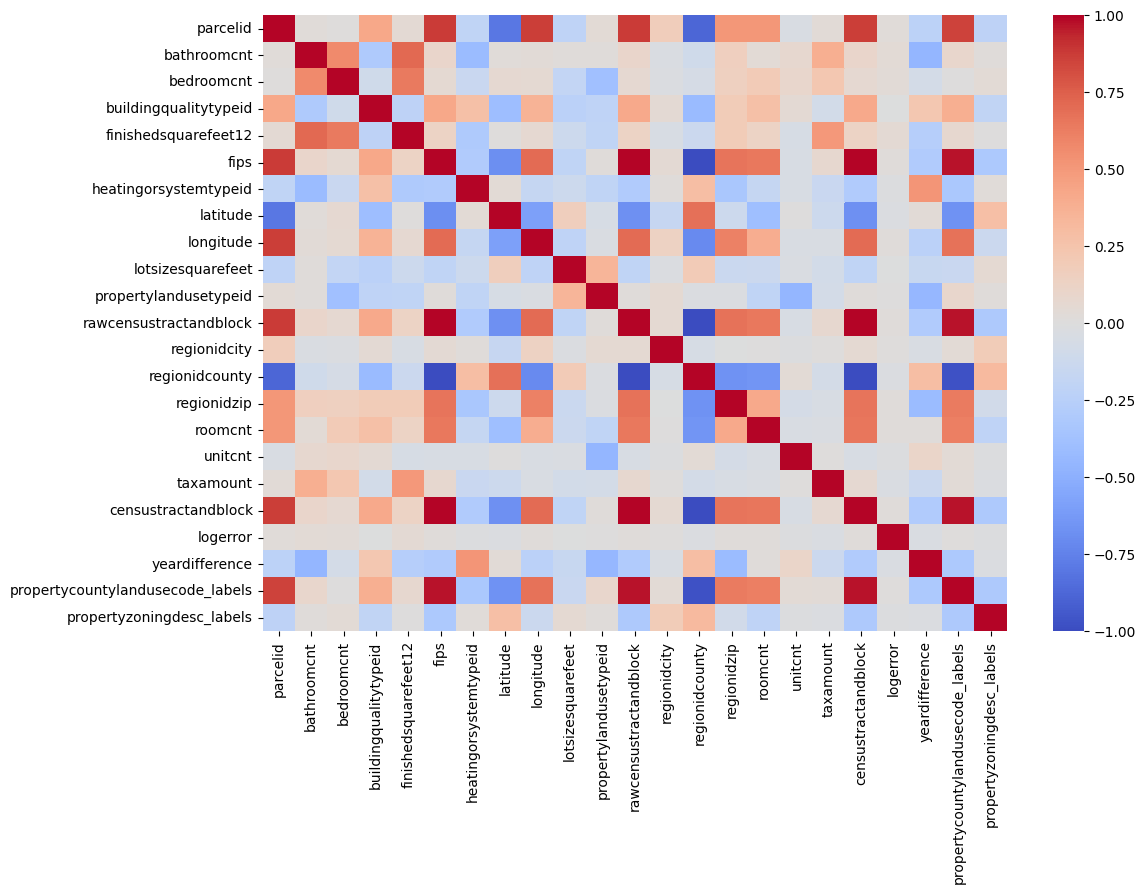

In [25]:
no_out_df.drop(columns=['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'fullbathcnt'], axis=1, inplace=True)
plt.figure(figsize=(12,8))
sns.heatmap(no_out_df.corr(), cmap='coolwarm')

### Re-Examining Dataset:

In [26]:
no_out_df.shape

(70260, 23)

In [27]:
no_out_df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
26,10726315,3.0,3.0,4.0,2445.0,6037.0,2.0,34.184300,-118.657000,63878.0,266.0,60.371352,12447.0,3101.0,96389.0,0.0,1.0,7170.22,60.371352,0.0383,33.0,9,627
27,10727091,2.0,3.0,7.0,1160.0,6037.0,2.0,34.188121,-118.646361,7688.0,261.0,60.371352,12447.0,3101.0,96342.0,0.0,1.0,5421.96,60.371352,0.0030,55.0,2,638
28,10730788,2.0,4.0,7.0,1570.0,6037.0,2.0,34.188446,-118.616724,11308.0,261.0,60.371351,12447.0,3101.0,96342.0,0.0,1.0,5097.78,60.371351,-0.0020,56.0,2,638
29,10735394,3.0,4.0,4.0,2863.0,6037.0,2.0,34.171439,-118.646883,16376.0,261.0,60.371373,12447.0,3101.0,96389.0,0.0,1.0,7475.21,60.371373,0.0129,52.0,3,632
31,10743512,3.0,2.0,4.0,1394.0,6037.0,2.0,34.152890,-118.791494,77543.0,269.0,60.378003,34278.0,3101.0,96385.0,0.0,1.0,5550.36,60.378003,0.0630,17.0,10,769
32,10760933,2.0,4.0,7.0,1212.0,6037.0,7.0,34.220631,-118.521001,7379.0,261.0,60.371313,12447.0,3101.0,96355.0,0.0,1.0,4560.02,60.371313,-0.1244,61.0,2,609
33,10772282,3.0,4.0,4.0,2597.0,6037.0,2.0,34.209413,-118.578052,10537.0,261.0,60.371341,12447.0,3101.0,96341.0,0.0,1.0,4998.86,60.371341,0.0545,51.0,2,638
34,10783331,2.0,3.0,7.0,1742.0,6037.0,7.0,34.185891,-118.550426,7076.0,261.0,60.371331,12447.0,3101.0,96364.0,0.0,1.0,5784.98,60.371331,0.0070,62.0,2,609
35,10784006,1.0,2.0,7.0,950.0,6037.0,7.0,34.192384,-118.549670,6242.0,261.0,60.371325,12447.0,3101.0,96364.0,0.0,1.0,3441.90,60.371325,0.0611,64.0,2,609
36,10799070,2.0,2.0,4.0,1001.0,6037.0,2.0,34.178100,-118.535000,87177.0,266.0,60.371393,12447.0,3101.0,96379.0,0.0,1.0,3833.83,60.371393,-0.0471,36.0,9,625


* Due to repetitive data, we will drop 1 of rawcensustractandblock and censustractandblock.
* The propertycountylandusecode_labels will serve no useful purpose for our model prediction.
* Hence we will drop those
* parcelid filed will also server no use for prediction.
* Hence we will drop those but after doing the train_test_split to keep the labels for predictions

In [28]:
no_out_df.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)
no_out_df.shape

(70260, 21)

### Saving Dataset:

In [29]:
no_out_df.to_csv('final_zillow_dataset.csv', index=False)

We have performed all the feature engineering steps necessary to ensure the dataset is ready to be fed to Machine Learning algorithms.
Next we will perform a train test split of the data followed by feature scaling.